#Stock Price Chatbot using Pre-trained LLM


###Exploratory Data Analysis
Dataset: https://www.kaggle.com/datasets/syedfaizanalii/nividia-stock-dataset-2023-2024

* **Date**: The specific date of the trading day (YYYY-MM-DD format).

* **Open**: The stock's price at the start of the trading day.

* **High**: The highest price the stock reached during the trading day.

* **Low**: The lowest price the stock reached during the trading day.

* **Close**: The stock's price at the end of the trading day.

* **Adj Close (Adjusted Close)**: The closing price after adjustments for corporate actions such as dividends, stock splits, etc. It provides a more accurate reflection of the stock's value over time.

* **Volume**: The total number of shares traded during the trading day.

This dataset can be used for analyzing stock price trends, volatility, and trading volume over time.

In [10]:
import pandas as pd
file_path = "/content/nvidia_stock_data.csv"

table = pd.read_csv(file_path)
table.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,14.851,14.996,14.096,14.315,14.305580,401277000
1,2023-01-04,14.567,14.853,14.241,14.749,14.739294,431324000
2,2023-01-05,14.491,14.564,14.148,14.265,14.255614,389168000
3,2023-01-06,14.474,15.010,14.034,14.859,14.849222,405044000
4,2023-01-09,15.284,16.056,15.141,15.628,15.617717,504231000


In [11]:
table.describe()

,Open,High,Low,Close,Adj Close,Volume
count,437.000000,437.000000,437.000000,437.000000,437.000000,4.370000e+02
mean,62.618792,63.795366,61.340346,62.635151,62.621695,4.554760e+08
std,34.893995,35.606990,33.951698,34.782847,34.783928,1.582334e+08
min,14.474000,14.564000,14.034000,14.265000,14.255614,1.739110e+08
25%,40.097000,40.500000,39.057999,39.770000,39.750576,3.610260e+08
50%,47.500000,48.230000,46.742001,47.506001,47.495808,4.277170e+08
75%,90.000000,91.300003,88.400002,90.356003,90.340851,5.136480e+08
max,139.800003,140.759995,132.419998,135.580002,135.568405,1.543911e+09


In [3]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       437 non-null    object 
 1   Open       437 non-null    float64
 2   High       437 non-null    float64
 3   Low        437 non-null    float64
 4   Close      437 non-null    float64
 5   Adj Close  437 non-null    float64
 6   Volume     437 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 24.0+ KB


In [4]:
#by doing the following evaluation, we understand that there is no missing values in the dataset
table.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


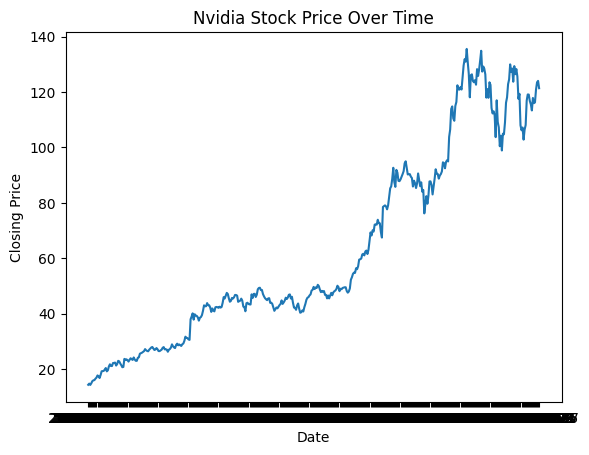

In [12]:
import matplotlib.pyplot as plt
plt.plot(table['Date'], table['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Nvidia Stock Price Over Time')
plt.show()


In [6]:
table.drop('Date', axis=1, inplace=True)

<Axes: >

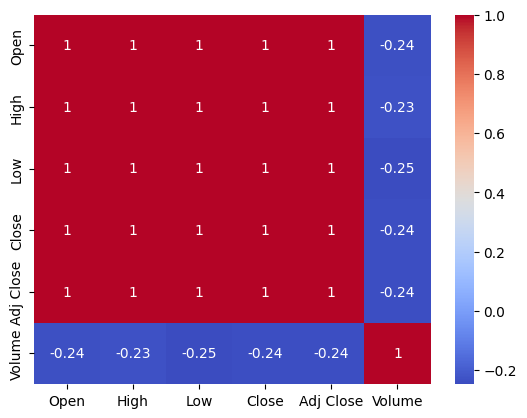

In [7]:
import seaborn as sns
sns.heatmap(table.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Low', ylabel='Count'>

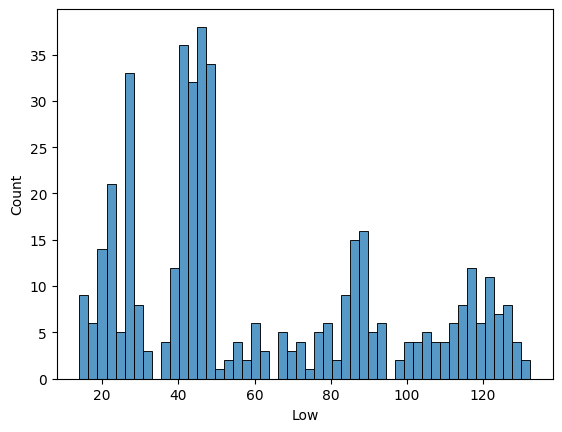

In [8]:
sns.histplot(table['Low'], bins=50)

<Axes: xlabel='Date'>

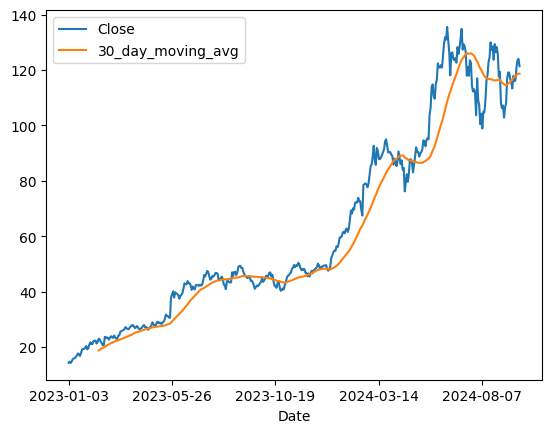

In [13]:
table['30_day_moving_avg'] = table['Close'].rolling(window=30).mean()
table[['Date', 'Close', '30_day_moving_avg']].plot(x='Date')